In [1]:
!pip install SRPAstro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 26.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 42.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.

Data from: https://astrostatistics.psu.edu/datasets/Chandra_flares.html

In [2]:
from GL_algorithm import compute_GL,compute_bin
import numpy as np
import matplotlib.pyplot as plt
from SRP.SRPPlot.SetPlotPars import SetPlotPars

"GL_algorithm" is a library implementing the Gregory & Lorendo (1992) algorithm.

It computes the likelihood of a set of arrival times originating
from a periodic system rather than constant rate (poisson) background noise.


In [3]:
def import_data(fname):
    G=np.loadtxt(fname,skiprows=1)# ignore first line, which is just column headers
    T=G[:,0] # only need first col, which contains arrival times
    return T,G

In [4]:
T,G = import_data('COUP551.dat')

**COUP #551** is a faint flaring star in Orion. More info from: http://arxiv.org/abs/astro-ph/0504370

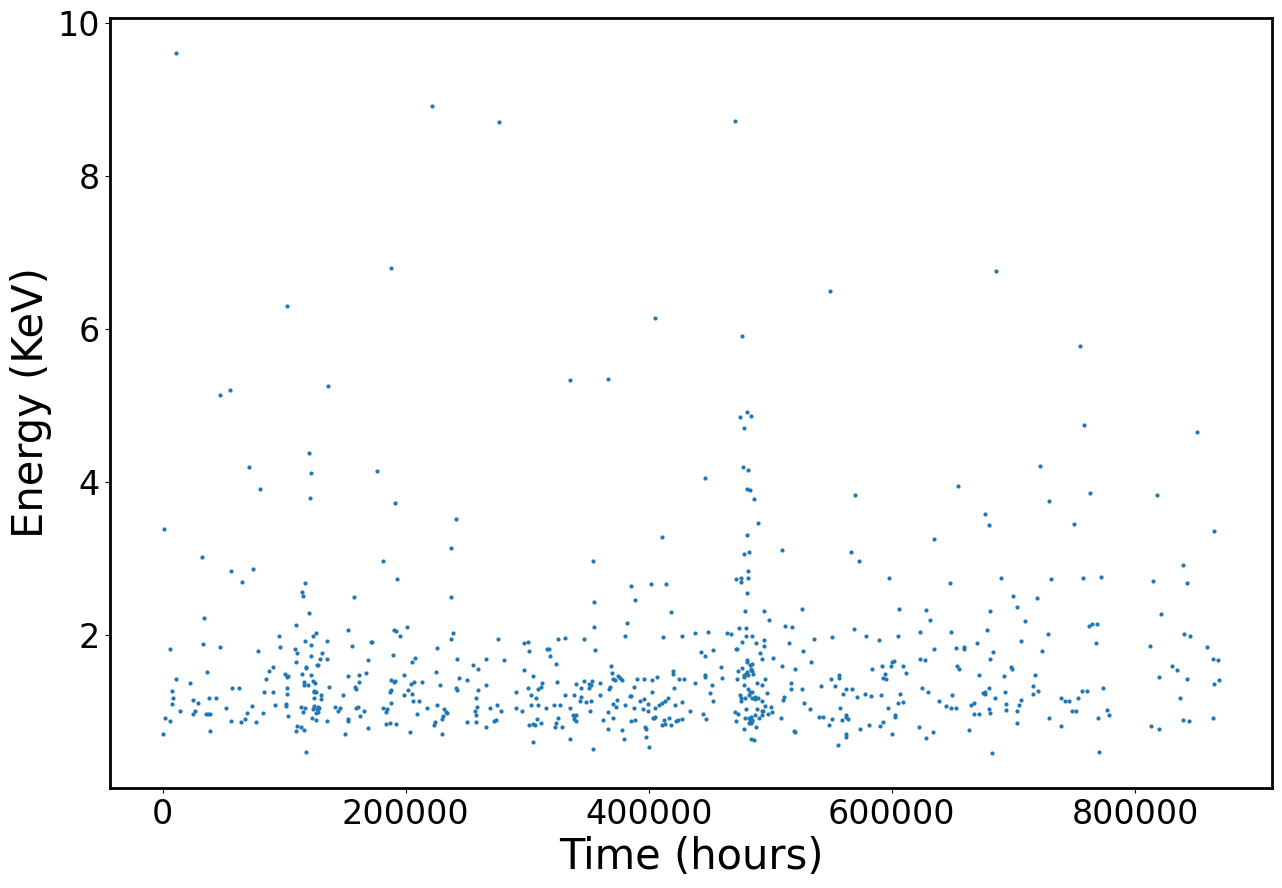

In [5]:
p = plt.figure(figsize=(15,10))
px = p.add_subplot(111)
SetPlotPars(px,"Time (hours)", "Energy (KeV)")
plt.plot(G[:,0],G[:,1],'o',ms=2);

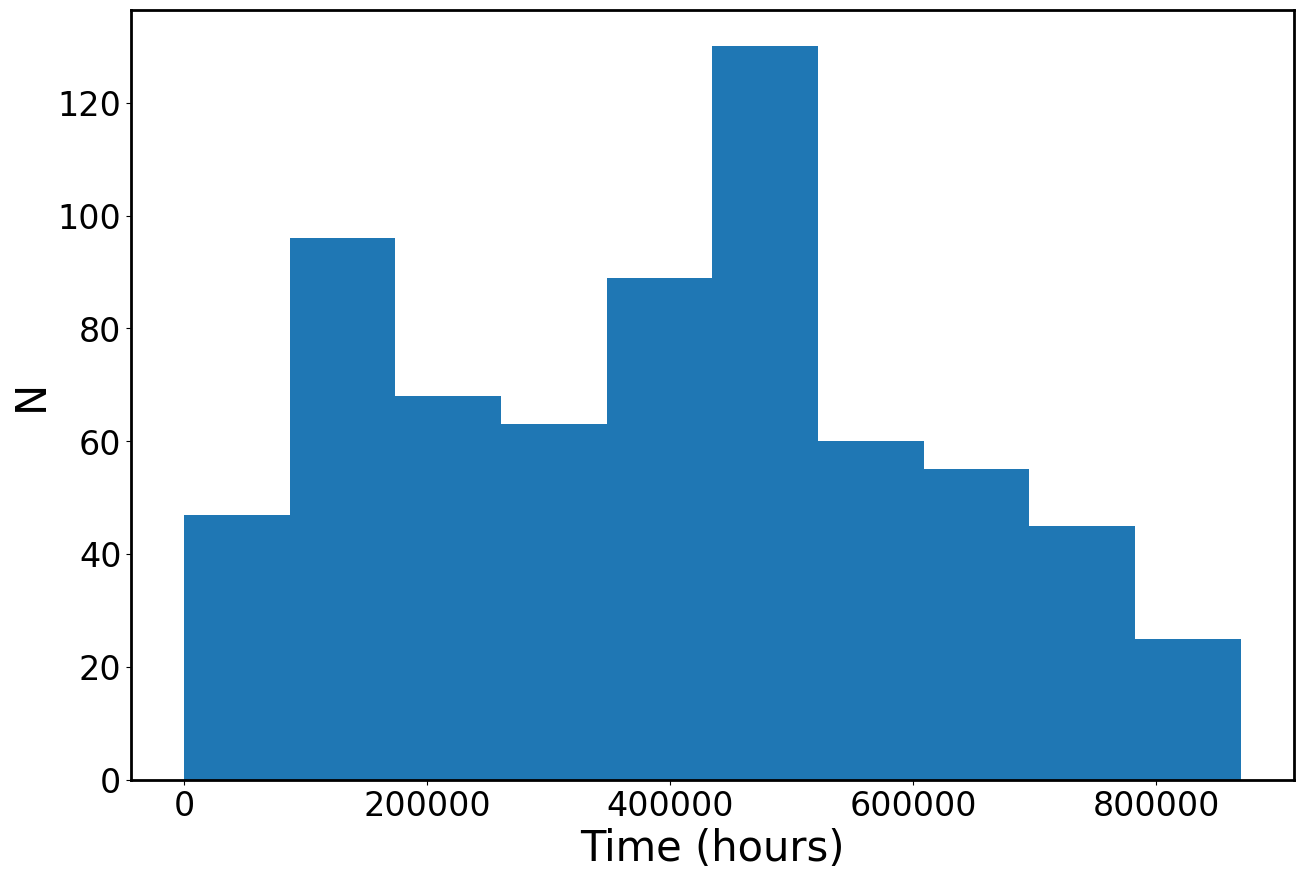

In [6]:
p = plt.figure(figsize=(15,10))
px = p.add_subplot(111)
SetPlotPars(px,"Time (hours)", "N")
h = plt.hist(G[:,0]);

In [7]:
O_period,p_period,m_opt,S,w,w_peak,w_mean,w_conf=compute_GL(T,parallel=True)

- O_period - Odds ratio for a periodic process vs. constant rate process

- p_period - probability of a periodic process 0<=p_period<=1

- m_opt    - optimal bin size 1<= m_opt <=m_max

- S        - The probability spectrum

- w        - The frequency range for S

- w_peak   - the expected frequency of the process

- w_conf   - 95% confidence interval of w_peak

In [8]:
n=compute_bin(T,m=m_opt,w=w_peak,p=0) # compute resulting bin histogram

In [9]:
print('Likelihood of periodic process: {:3.2f}%'.format(p_period*100))
print('Most likely frequency: {:.3g} or period: {:.1f}'.format(w_peak,2*np.pi/w_peak))
print('95 %% confidence interval: [{:.3g}, {:.3g}]'.format(2*np.pi/w_conf[1],2*np.pi/w_conf[0]))
print('Optimal bin size: {}'.format(m_opt))

Likelihood of periodic process: 100.00%
Most likely frequency: 8.56e-05 or period: 73376.8
95 %% confidence interval: [7.28e+04, 7.37e+04]
Optimal bin size: 5


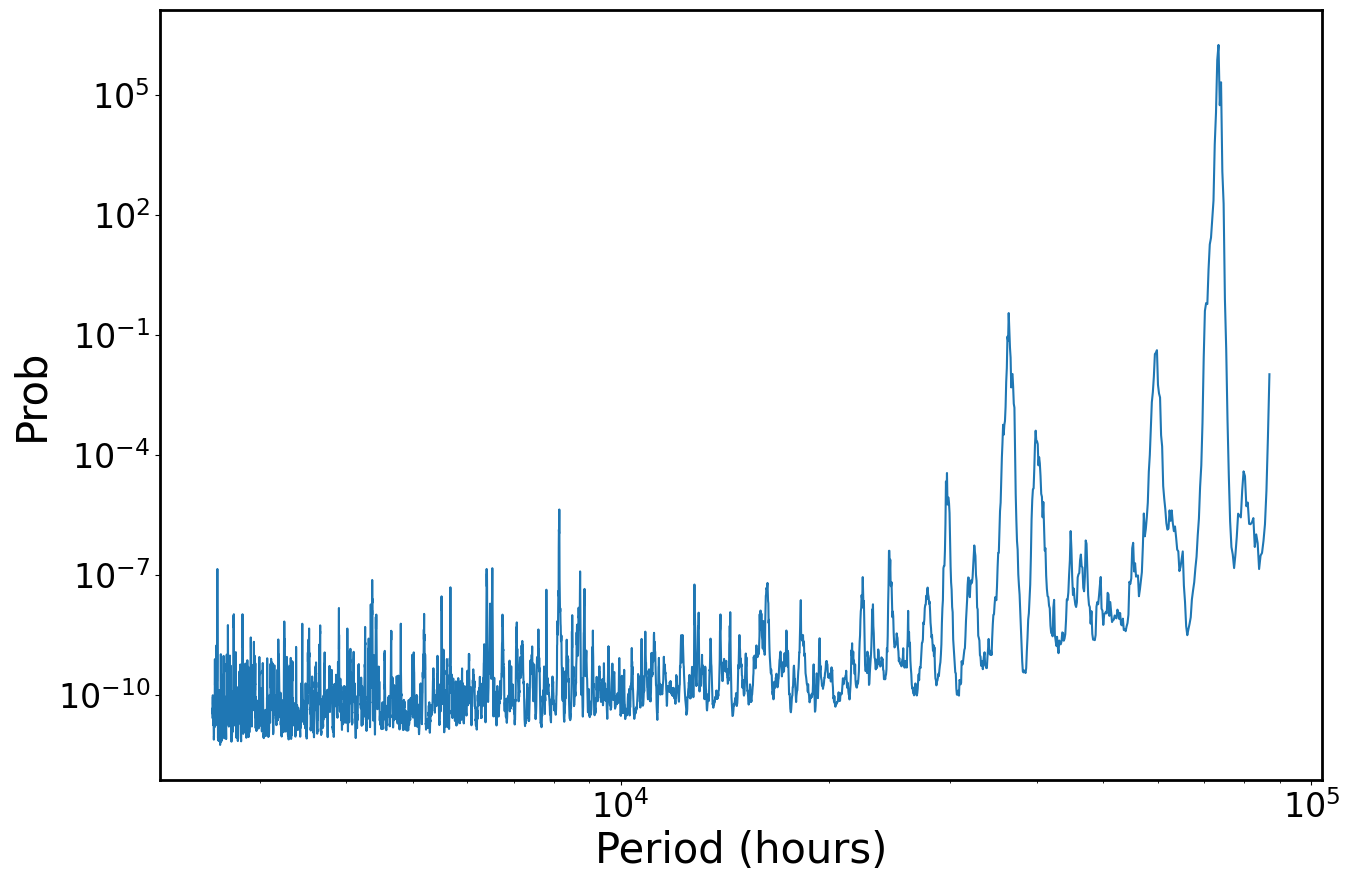

In [10]:
p = plt.figure(figsize=(15,10))
px = p.add_subplot(111)
SetPlotPars(px,"Period (hours)", "Prob")
plt.plot(2*np.pi/w,S)
plt.loglog();

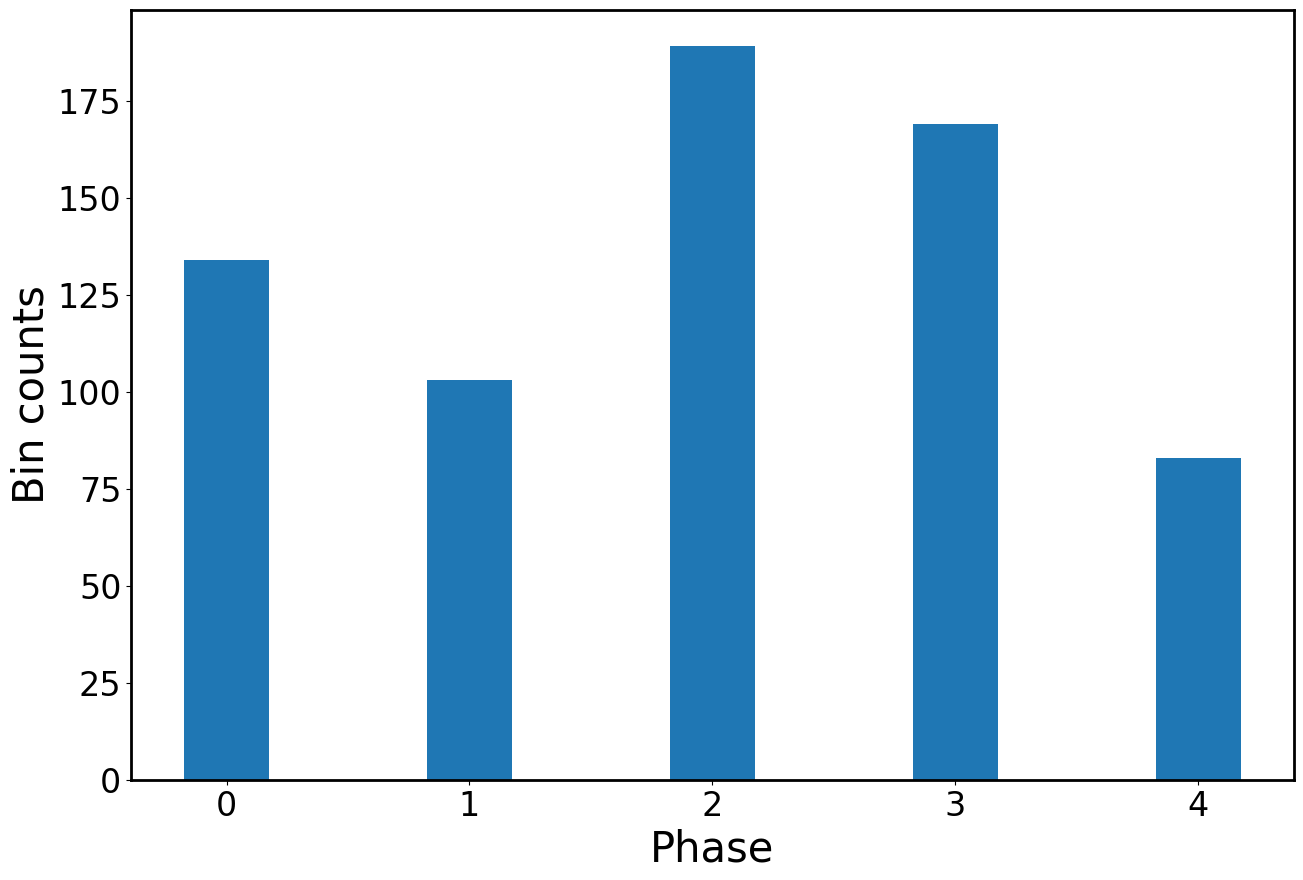

In [11]:
p = plt.figure(figsize=(15,10))
px = p.add_subplot(111)
SetPlotPars(px,"Phase", "Bin counts")
ind=np.arange(n.size)
plt.bar(ind, n, 0.35);